In [550]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [551]:
hr_data = pd.read_csv('datafiles/HR_dataset.csv')

In [552]:
hr_data.columns=(['name', 'emp_num', 'state', 'zip', 'DOB', 'age', 'sex', 'marital_desc', 'citizen_desc', 'hispanic', 'race', 'date_of_hire', 'date_of_term', 'reason_for_term', 'emp_status', 'department', 'position', 'pay_rate', 'manager_name', 'employee_source', 'performance_score'])

In [553]:
hr_data.head()

,name,emp_num,state,zip,DOB,age,sex,marital_desc,citizen_desc,hispanic,...,date_of_hire,date_of_term,reason_for_term,emp_status,department,position,pay_rate,manager_name,employee_source,performance_score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,No,...,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,No,...,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,No,...,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,No,...,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,No,...,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [554]:
hr_data.isna().sum()

name                   1
emp_num                1
state                  1
zip                    1
DOB                    1
age                    1
sex                    1
marital_desc           1
citizen_desc           1
hispanic               1
race                   1
date_of_hire           1
date_of_term         199
reason_for_term        1
emp_status             1
department             1
position               1
pay_rate               1
manager_name           1
employee_source        1
performance_score      1
dtype: int64

In [555]:
hr_data['sex'].replace('male','Male', inplace = True)

In [556]:
hr_data = hr_data[pd.notnull(hr_data['name'])]
hr_data = hr_data.fillna(0)

In [557]:
hr_data.shape

(301, 21)

In [558]:
gle = LabelEncoder()
employee_labels = gle.fit_transform(hr_data['emp_status'])
current_employee = {index: label for index, label in 
                  enumerate(gle.classes_)}

[Text(0, 0, 'Fully Meets'),
 Text(0, 0, 'N/A- too early to review'),
 Text(0, 0, '90-day meets'),
 Text(0, 0, 'Exceptional'),
 Text(0, 0, 'Needs Improvement'),
 Text(0, 0, 'Exceeds'),
 Text(0, 0, 'PIP')]

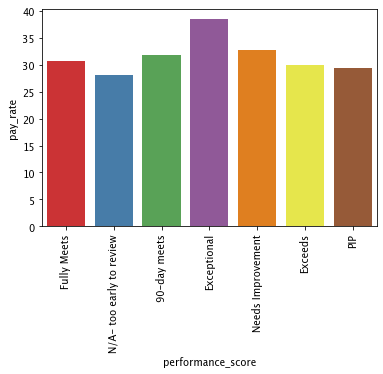

In [559]:
performance_chart = sns.barplot(x = 'performance_score', y = 'pay_rate', data=hr_data, palette='Set1', ci=None)
performance_chart.set_xticklabels(performance_chart.get_xticklabels(),rotation=90)

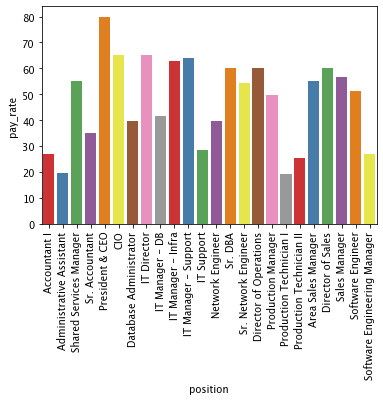

In [560]:
position_chart = sns.barplot(x = 'position', y = 'pay_rate', data=hr_data, palette='Set1', ci = None)
position_chart.set_xticklabels(position_chart.get_xticklabels(),rotation=90)
plt.show()

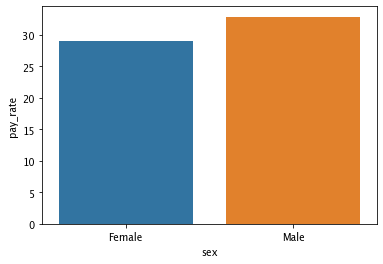

In [561]:
sns.barplot(x = 'sex', y = 'pay_rate', data=hr_data, ci=None )


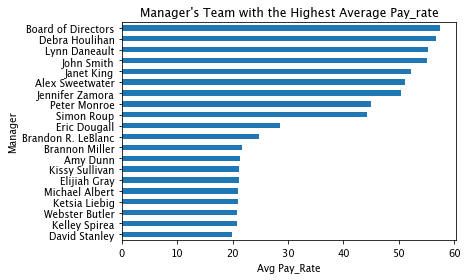

In [562]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['manager_name'])['pay_rate'].mean()
df = df.sort_values(axis=0)

xlabel = 'Avg Pay_Rate'
ylabel = 'Manager'
title= "Manager's Team with the Highest Average Pay_rate"

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

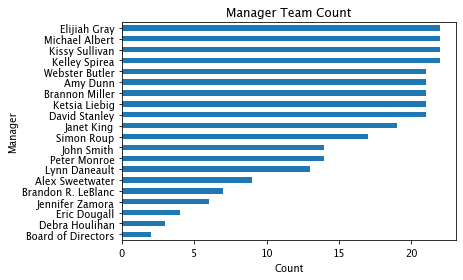

In [563]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['manager_name'])['pay_rate'].count()
df = df.sort_values(axis=0)

xlabel = 'Count'
ylabel = 'Manager'
title= "Manager Team Count"

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

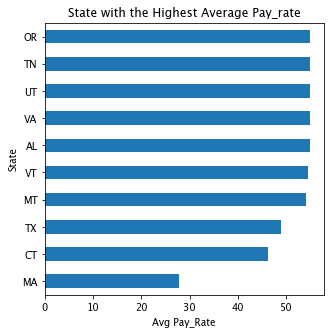

In [564]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['state'])['pay_rate'].mean()
df = df.sort_values(axis=0)
df = df.head(10)

xlabel = 'Avg Pay_Rate'
ylabel = 'State'
title= "State with the Highest Average Pay_rate"
fig = plt.figure(figsize=(5,5))

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

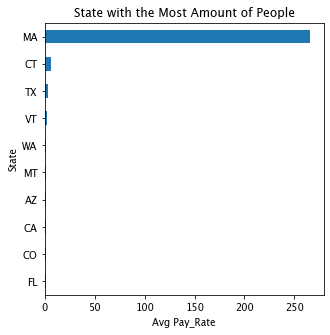

In [565]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['state'])['pay_rate'].count()
df = df.sort_values(axis=0)
df = df.tail(10)

xlabel = 'Avg Pay_Rate'
ylabel = 'State'
title= "State with the Most Amount of People"
fig = plt.figure(figsize=(5,5))

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

# Dummy Variables 
**we want to create dummy variables for sex and positions**
- we drop the first column
    - sex_female was dropped 
    - position Accountant 1 was dropped 
    - '90-day meets' performance score was dropped
    - 'Alex Sweetwater'manager was dropped


In [566]:
performance_labels = gle.fit_transform(hr_data['performance_score'])
performances = {index: label for index, label in 
                  enumerate(gle.classes_)}

managers_labels = gle.fit_transform(hr_data['manager_name'])
managers = {index: label for index, label in 
                  enumerate(gle.classes_)}

In [567]:
hr_data = pd.get_dummies(hr_data, columns = ['sex','manager_name', 'position'], drop_first=True)

In [568]:
hr_data = hr_data.drop(columns='emp_num')

In [569]:
hr_data.corr()

,zip,age,pay_rate,sex_Male,manager_name_Amy Dunn,manager_name_Board of Directors,manager_name_Brandon R. LeBlanc,manager_name_Brannon Miller,manager_name_David Stanley,manager_name_Debra Houlihan,...,position_Production Manager,position_Production Technician I,position_Production Technician II,position_Sales Manager,position_Shared Services Manager,position_Software Engineer,position_Software Engineering Manager,position_Sr. Accountant,position_Sr. DBA,position_Sr. Network Engineer
zip,1.000000,-0.013362,0.412814,0.056232,-0.074194,-0.022567,-0.041815,-0.073724,-0.074353,0.013050,...,-0.060235,-0.243854,-0.131267,0.013050,-0.023634,-0.047208,-0.015230,-0.021217,-0.023785,-0.022822
age,-0.013362,1.000000,0.016798,-0.001973,0.016781,0.109486,-0.130455,0.064983,-0.075242,-0.103558,...,0.094227,0.046693,-0.011631,-0.103558,-0.050825,-0.095991,0.080523,-0.041664,0.051368,0.085187
pay_rate,0.412814,0.016798,1.000000,0.123167,-0.169995,0.144071,-0.059490,-0.162484,-0.194891,0.171958,...,0.275711,-0.693912,-0.168869,0.171958,0.130746,0.235266,-0.014120,0.022799,0.223722,0.203153
sex_Male,0.056232,-0.001973,0.123167,1.000000,-0.022721,-0.069873,-0.042558,-0.022721,-0.049127,-0.017999,...,0.066859,-0.059232,-0.069534,-0.017999,0.095731,-0.031494,0.067579,-0.069873,0.018346,0.046863
manager_name_Amy Dunn,-0.074194,0.016781,-0.169995,-0.022721,1.000000,-0.022398,-0.042258,-0.075000,-0.075000,-0.027478,...,-0.060486,0.144426,0.067344,-0.027478,-0.022398,-0.048080,-0.015811,-0.022398,-0.031782,-0.035593
manager_name_Board of Directors,-0.022567,0.109486,0.144071,-0.069873,-0.022398,1.000000,-0.012620,-0.022398,-0.022398,-0.008206,...,-0.018064,-0.074252,-0.039530,-0.008206,-0.006689,-0.014359,-0.004722,0.496656,-0.009491,-0.010630
manager_name_Brandon R. LeBlanc,-0.041815,-0.130455,-0.059490,-0.042558,-0.042258,-0.012620,1.000000,-0.042258,-0.042258,-0.015482,...,-0.034080,-0.140089,-0.074579,-0.015482,-0.012620,-0.027090,-0.008909,0.258707,-0.017907,-0.020055
manager_name_Brannon Miller,-0.073724,0.064983,-0.162484,-0.022721,-0.075000,-0.022398,-0.042258,1.000000,-0.075000,-0.027478,...,-0.060486,0.144426,0.067344,-0.027478,-0.022398,-0.048080,-0.015811,-0.022398,-0.031782,-0.035593
manager_name_David Stanley,-0.074353,-0.075242,-0.194891,-0.049127,-0.075000,-0.022398,-0.042258,-0.075000,1.000000,-0.027478,...,-0.060486,0.144426,0.067344,-0.027478,-0.022398,-0.048080,-0.015811,-0.022398,-0.031782,-0.035593
manager_name_Debra Houlihan,0.013050,-0.103558,0.171958,-0.017999,-0.027478,-0.008206,-0.015482,-0.027478,-0.027478,1.000000,...,-0.022160,-0.091092,-0.048495,1.000000,-0.008206,-0.017615,-0.005793,-0.008206,-0.011644,-0.013040


In [570]:
#abs(hr_data.corr())>0.75

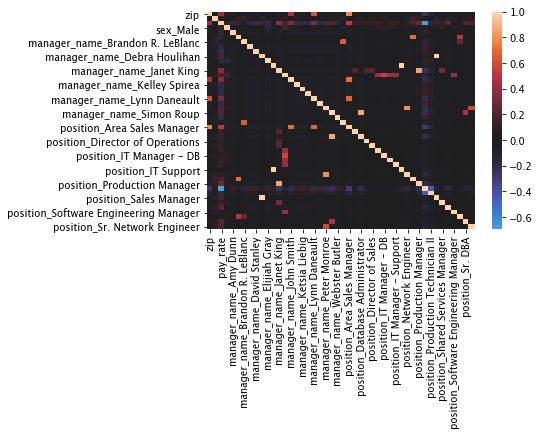

In [571]:

sns.heatmap(hr_data.corr(), center=0)


In [572]:
hr_data.columns

Index(['name', 'state', 'zip', 'DOB', 'age', 'marital_desc', 'citizen_desc',
       'hispanic', 'race', 'date_of_hire', 'date_of_term', 'reason_for_term',
       'emp_status', 'department', 'pay_rate', 'employee_source',
       'performance_score', 'sex_Male', 'manager_name_Amy Dunn',
       'manager_name_Board of Directors', 'manager_name_Brandon R. LeBlanc',
       'manager_name_Brannon Miller', 'manager_name_David Stanley',
       'manager_name_Debra Houlihan', 'manager_name_Elijiah Gray',
       'manager_name_Eric Dougall', 'manager_name_Janet King',
       'manager_name_Jennifer Zamora', 'manager_name_John Smith',
       'manager_name_Kelley Spirea', 'manager_name_Ketsia Liebig',
       'manager_name_Kissy Sullivan', 'manager_name_Lynn Daneault',
       'manager_name_Michael Albert', 'manager_name_Peter Monroe',
       'manager_name_Simon Roup', 'manager_name_Webster Butler',
       'position_Administrative Assistant', 'position_Area Sales Manager',
       'position_CIO', 'positio

In [573]:
# feats = ['manager_name_Amy Dunn','performance_score_Exceeds', 'performance_score_Exceptional','performance_score_Fully Meets','performance_score_N/A- too early to review','performance_score_Needs Improvement', 'performance_score_PIP']
# corr = hr_data[feats].corr()
# descr = hr_data[feats].describe()
# descr

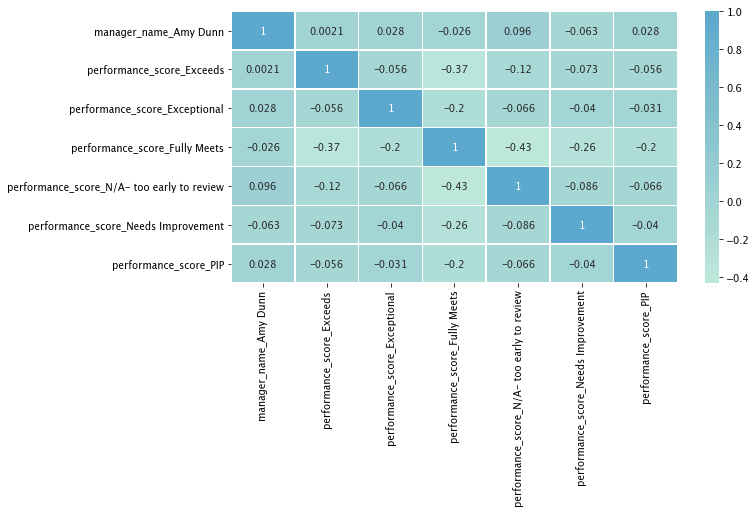

In [574]:
fig, ax = plt.subplots(figsize=(10,5))   
ax = sns.heatmap(corr, center=5, annot=True, linewidths=.5, ax=ax)

In [575]:
#Removing columns
hr_data = hr_data.drop(columns=['DOB','date_of_term','zip'])

#Dummy Variables
hr_data = pd.get_dummies(hr_data, columns = ['state', 'marital_desc', 'race', 'performance_score'], drop_first=True)
# dropping AL as the first | devorced columns | Native American column


In [576]:
#Formatting Columns
hr_data['hispanic'].replace('yes','1', inplace = True)
hr_data['hispanic'].replace('no','0', inplace = True)
hr_data['hispanic'].replace('Yes','1', inplace = True)
hr_data['hispanic'].replace('No','0', inplace = True)
hr_data['citizen_desc'].replace('US Citizen','1', inplace = True)
hr_data['citizen_desc'].replace('Non-Citizen','0', inplace = True)
hr_data['citizen_desc'].replace('Eligible NonCitizen','0', inplace = True)

In [577]:
hr_data['date_of_hire']=pd.to_datetime(hr_data['date_of_hire'])
hr_data['date_of_hire']

0     2008-10-27
1     2014-01-06
2     2014-09-29
3     2015-02-16
4     2015-05-01
         ...    
296   2011-11-07
297   2012-11-05
298   2014-07-07
299   2013-02-18
300   2011-08-15
Name: date_of_hire, Length: 301, dtype: datetime64[ns]

In [578]:
hr_data['month_of_hire'] = hr_data['date_of_hire'].dt.month
hr_data['year_of_hire'] = hr_data['date_of_hire'].dt.year
hr_data = hr_data.drop(columns=['date_of_hire'])

In [579]:
hr_data['reason_for_term'].value_counts()

N/A - still employed                188
Another position                     20
unhappy                              14
N/A - Has not started yet            11
more money                           11
hours                                 9
career change                         9
attendance                            7
relocation out of area                5
return to school                      5
military                              4
performance                           4
retiring                              4
no-call, no-show                      3
maternity leave - did not return      3
medical issues                        3
gross misconduct                      1
Name: reason_for_term, dtype: int64

In [580]:
hr_data = hr_data.drop(columns=['reason_for_term'])
#Another position was dropped

In [581]:
hr_data['emp_status'].value_counts()

Active                    174
Voluntarily Terminated     88
Terminated for Cause       14
Leave of Absence           14
Future Start               11
Name: emp_status, dtype: int64

In [582]:
hr_data = pd.get_dummies(hr_data, columns = ['emp_status'], drop_first=True) #dropped Active

In [584]:
hr_data = hr_data.drop(300)
hr_data = pd.get_dummies(hr_data, columns = ['department'], drop_first=True) #dropped Admin Offices

In [587]:
hr_data = hr_data.drop(columns=['employee_source'])

In [593]:
hr_data.to_csv('hrdata_cleaned')